In [1]:
from queryFreeSurferMeasures import *
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Specify the filename
# fsDb = "/Users/schabdachj/Projects/mpr_analysis/sandbox_mpr_preproc_fsresults.db"
fsDb = "/Users/schabdachj/Data/sandbox/tables/no_preproc_mpr_results.db"
fsPreprocDb = "/Users/schabdachj/Data/sandbox/tables/preproc_mpr_results.db"

In [25]:
## Load the freesurfer results as a dataframe

assert os.path.exists(fsDb)
assert os.path.exists(fsPreprocDb)

# Connect to the database
cursor, connection = connectToDatabase(fsDb)

# Get a list of ids where one image id is returned per subject
idsStringForQuery, metadataDf = getSingleImageIdPerSubject(cursor)
print(metadataDf.shape)
idsStringForQuery, metadataDf = getAllImageIdsPerSubject(cursor)
print(metadataDf.shape)
metadataDf['session_id'] = metadataDf['session_id'].astype(np.int64)
metadataDf = metadataDf.set_index('session_id')

# Get the volumetric metrics for the image ids
measDf = getMeasureStatsAsDf(cursor, idsStringForQuery)

# Close the connection to the database
closeDatabase(connection)

# Convert the dataframes to numeric where relevant
for header in list(measDf):
    measDf[header] = measDf[header].astype(float)

measDf = measDf.infer_objects()
print(measDf.shape)

origDf = metadataDf.join(measDf, on='session_id')
origDf = origDf.dropna()

(12, 4)
(20, 4)
(17, 22)


In [62]:
# Connect to the database
cursor, connection = connectToDatabase(fsPreprocDb)

# Get a list of ids where one image id is returned per subject
idsStringForQuery, metadataDf = getSingleImageIdPerSubject(cursor)
print(metadataDf.shape)
idsStringForQuery, metadataDf = getAllImageIdsPerSubject(cursor)
print(metadataDf.shape)

metadataDf['session_id'] = metadataDf['session_id'].astype(np.int64)
metadataDf = metadataDf.set_index('session_id')

# Get the volumetric metrics for the image ids
measPreDf = getMeasureStatsAsDf(cursor, idsStringForQuery)
print(measPreDf.shape)
print(list(measPreDf))

# # Close the connection to the database
# closeDatabase(connection)

# # Convert the dataframes to numeric where relevant
# for header in list(measPreDf):
#     measPreDf[header] = measPreDf[header].astype(float)

# measPreDf = measPreDf.infer_objects()
# print(measPreDf.shape)

# ## Join the measures and metadata dataframes on session_id (index, but still need to specify)
# preprocDf = metadataDf.join(measPreDf, on='session_id')
# preprocDf = preprocDf.dropna()

(11, 4)
(69, 4)
199 (4,2,5,1,3,7,9,12,8,11,6,10,16,17,18,13,15,14,24,21,25,19,22,20,23,31,29,30,27,33,26,32,28,39,42,36,41,35,40,38,34,37,45,46,48,44,43,47,51,53,49,54,50,55,52,58,61,56,57,59,60,63,62,64,67,66,69,65,68)
(26, 22)
['BrainSeg', 'BrainSegNotVent', 'BrainSegNotVentSurf', 'BrainSegVol-to-eTIV', 'CerebralWhiteMatter', 'Cortex', 'EstimatedTotalIntraCranialVol', 'Mask', 'MaskVol-to-eTIV', 'SubCortGray', 'SupraTentorial', 'SupraTentorialNotVent', 'SupraTentorialNotVentVox', 'SurfaceHoles', 'TotalGray', 'VentricleChoroidVol', 'lhCerebralWhiteMatter', 'lhCortex', 'lhSurfaceHoles', 'rhCerebralWhiteMatter', 'rhCortex', 'rhSurfaceHoles']


In [27]:
preprocDf

,subj,session,run,BrainSeg,BrainSegNotVent,BrainSegNotVentSurf,BrainSegVol-to-eTIV,CerebralWhiteMatter,Cortex,EstimatedTotalIntraCranialVol,...,SupraTentorialNotVentVox,SurfaceHoles,TotalGray,VentricleChoroidVol,lhCerebralWhiteMatter,lhCortex,lhSurfaceHoles,rhCerebralWhiteMatter,rhCortex,rhSurfaceHoles
session_id,,,,,,,,,,,,,,,,,,,,,
7,sub-22q0206,ses-1.3.6.1.4.1.11129.5.1.29734252841840251063...,sub-22q0206_ses-1.3.6.1.4.1.11129.5.1.29734252...,824740.0,814967.0,8.155236e+05,0.744624,303706.440951,423376.130096,1.107593e+06,...,759060.0,437.0,501773.130096,8343.0,150164.451433,213090.499468,219.0,153541.989519,210285.630628,218.0
9,sub-22q0206,ses-1.3.6.1.4.1.11129.5.1.29734252841840251063...,sub-22q0206_ses-1.3.6.1.4.1.11129.5.1.29734252...,917509.0,898539.0,8.975114e+05,0.804510,302499.748913,444697.684200,1.140457e+06,...,791582.0,44.0,564619.684200,16275.0,150987.001086,221072.536400,25.0,151512.747827,223625.147800,19.0
8,sub-22q0206,ses-1.3.6.1.4.1.11129.5.1.29734252841840251063...,sub-22q0206_ses-1.3.6.1.4.1.11129.5.1.29734252...,754899.0,745087.0,7.403812e+05,0.699641,269848.413104,370292.812330,1.078981e+06,...,683562.0,349.0,459471.812330,7891.0,142645.542773,198102.485302,207.0,127202.870331,172190.327028,142.0
6,sub-22q0206,ses-1.3.6.1.4.1.11129.5.1.29734252841840251063...,sub-22q0206_ses-1.3.6.1.4.1.11129.5.1.29734252...,891914.0,875656.0,8.719994e+05,0.797103,288555.949427,430343.436143,1.118944e+06,...,767537.0,235.0,552441.436143,14353.0,143763.580118,218285.011512,132.0,144792.369309,212058.424632,103.0
13,sub-22q0206,ses-1.3.6.1.4.1.11129.5.1.49788704941883579644...,sub-22q0206_ses-1.3.6.1.4.1.11129.5.1.49788704...,608066.0,593669.0,5.919019e+05,0.846272,164993.954515,314058.958192,7.185232e+05,...,513106.0,409.0,416184.958192,12828.0,81585.817904,159117.053914,205.0,83408.136611,154941.904278,204.0
14,sub-22q0206,ses-1.3.6.1.4.1.11129.5.1.49788704941883579644...,sub-22q0206_ses-1.3.6.1.4.1.11129.5.1.49788704...,612626.0,597952.0,5.963984e+05,0.834808,165757.928387,318398.441439,7.338529e+05,...,518065.0,333.0,419597.441439,12982.0,82369.051766,157975.200088,163.0,83388.876621,160423.241350,170.0
21,sub-22q0206,ses-1.3.6.1.4.1.11129.5.1.10256053594311204600...,sub-22q0206_ses-1.3.6.1.4.1.11129.5.1.10256053...,729385.0,715027.0,7.139705e+05,0.846976,214073.199151,380297.288022,8.611633e+05,...,629300.0,381.0,483042.288022,12586.0,108452.868753,188611.747217,199.0,105620.330398,191685.540805,182.0
19,sub-22q0206,ses-1.3.6.1.4.1.11129.5.1.10256053594311204600...,sub-22q0206_ses-1.3.6.1.4.1.11129.5.1.10256053...,647031.0,634131.0,6.320504e+05,0.892821,182168.837408,329249.533301,7.247040e+05,...,547401.0,311.0,437657.533301,11397.0,89964.906955,167939.960898,123.0,92203.930453,161309.572404,188.0
20,sub-22q0206,ses-1.3.6.1.4.1.11129.5.1.10256053594311204600...,sub-22q0206_ses-1.3.6.1.4.1.11129.5.1.10256053...,648711.0,635872.0,6.336104e+05,0.842417,181213.615822,335041.798070,7.700591e+05,...,552630.0,301.0,440674.798070,11246.0,91368.019609,169891.464117,133.0,89845.596213,165150.333953,168.0


In [28]:
origDf

,subj,session,run,BrainSeg,BrainSegNotVent,BrainSegNotVentSurf,BrainSegVol-to-eTIV,CerebralWhiteMatter,Cortex,EstimatedTotalIntraCranialVol,...,SupraTentorialNotVentVox,SurfaceHoles,TotalGray,VentricleChoroidVol,lhCerebralWhiteMatter,lhCortex,lhSurfaceHoles,rhCerebralWhiteMatter,rhCortex,rhSurfaceHoles
session_id,,,,,,,,,,,,,,,,,,,,,
2,sub-22q0206,ses-1.3.6.1.4.1.11129.5.1.29734252841840251063...,sub-22q0206_ses-1.3.6.1.4.1.11129.5.1.29734252...,926887.0,907297.0,9.067599e+05,0.815981,283843.753742,472680.172902,1.135917e+06,...,801243.0,98.0,603999.172902,16956.0,141530.902545,235101.940090,48.0,142312.851198,237578.232811,50.0
3,sub-22q0206,ses-1.3.6.1.4.1.11129.5.1.29734252841840251063...,sub-22q0206_ses-1.3.6.1.4.1.11129.5.1.29734252...,910168.0,893411.0,8.895064e+05,0.857778,279522.361970,457955.038081,1.061076e+06,...,787087.0,219.0,590317.038081,14684.0,139791.973057,230174.265849,117.0,139730.388913,227780.772233,102.0
4,sub-22q0206,ses-1.3.6.1.4.1.11129.5.1.49788704941883579644...,sub-22q0206_ses-1.3.6.1.4.1.11129.5.1.49788704...,663093.0,646037.0,6.456016e+05,0.846370,163624.315366,367193.303199,7.834548e+05,...,563623.0,359.0,470058.303199,14896.0,82243.486112,181275.711485,158.0,81380.829254,185917.591714,201.0
5,sub-22q0206,ses-1.3.6.1.4.1.11129.5.1.49788704941883579644...,sub-22q0206_ses-1.3.6.1.4.1.11129.5.1.49788704...,624663.0,609720.0,6.079705e+05,0.874496,152467.500263,333044.003203,7.143124e+05,...,520353.0,270.0,443088.003203,13168.0,75794.777371,166355.449345,128.0,76672.722891,166688.553858,142.0
6,sub-22q0206,ses-1.3.6.1.4.1.11129.5.1.10256053594311204600...,sub-22q0206_ses-1.3.6.1.4.1.11129.5.1.10256053...,711462.0,696710.0,6.962511e+05,0.856398,177839.652078,400118.497594,8.307611e+05,...,612661.0,272.0,504588.497594,12856.0,88810.356302,199369.634133,133.0,89029.295776,200748.863461,139.0
7,sub-22q0206,ses-1.3.6.1.4.1.11129.5.1.10256053594311204600...,sub-22q0206_ses-1.3.6.1.4.1.11129.5.1.10256053...,656869.0,643688.0,6.416511e+05,0.927903,173683.864318,346378.279297,7.079071e+05,...,556445.0,261.0,455297.279297,11503.0,86626.996339,175145.847149,97.0,87056.867979,171232.432148,164.0
9,sub-22q0206,ses-1.3.6.1.4.1.11129.5.1.30362359987877951550...,sub-22q0206_ses-1.3.6.1.4.1.11129.5.1.30362359...,885145.0,869245.0,8.691766e+05,0.778864,259864.379906,468271.236975,1.136456e+06,...,771445.0,144.0,592616.236975,13510.0,129973.304956,231416.133978,84.0,129891.074950,236855.102997,60.0
8,sub-22q0206,ses-1.3.6.1.4.1.11129.5.1.30362359987877951550...,sub-22q0206_ses-1.3.6.1.4.1.11129.5.1.30362359...,866073.0,853139.0,8.506383e+05,0.878095,263311.776743,440767.497744,9.863093e+05,...,749437.0,239.0,570298.497744,11156.0,131792.932843,222556.729707,122.0,131518.843900,218210.768037,117.0
10,sub-22q0206,ses-1.3.6.1.4.1.11129.5.1.11287165190516342569...,sub-22q0206_ses-1.3.6.1.4.1.11129.5.1.11287165...,371249.0,363738.0,3.660956e+05,0.499331,232652.583212,84185.979944,7.434933e+05,...,330685.0,196.0,126949.979944,6108.0,115289.707191,42033.040305,110.0,117362.876022,42152.939639,86.0


In [46]:
# Combine the two dataframes
df = pd.merge(preprocDf, origDf, how='outer', on=['subj', 'session', 'run'], suffixes=('_preproc', '_orig'))
# df = df.dropna()

print("Number of images after each trial:")
print("  Preprocess + recon-all:", preprocDf.shape[0])
print("          Only recon-all:", origDf.shape[0])
print("                   Total:", df.shape[0])
print("                  Shared:", df.dropna().shape[0])

Number of images after each trial:
  Preprocess + recon-all: 26
          Only recon-all: 17
                   Total: 35
                  Shared: 8


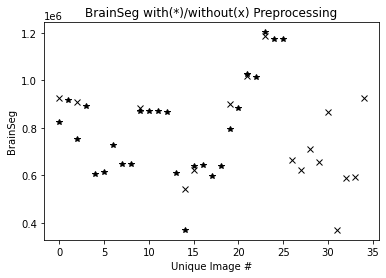

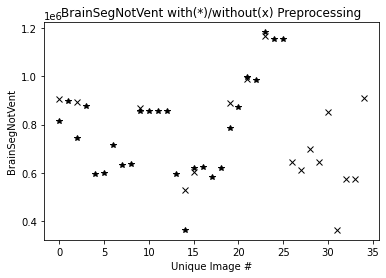

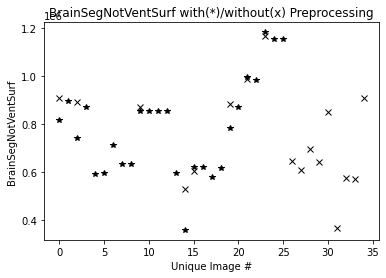

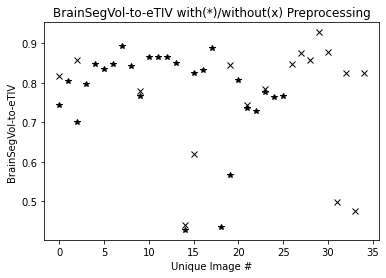

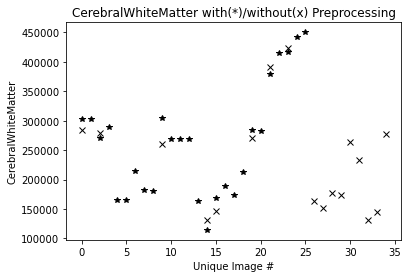

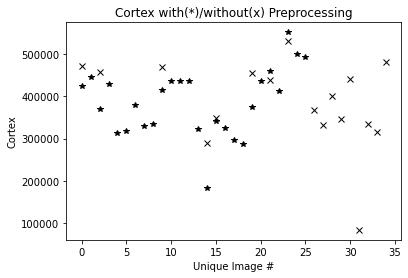

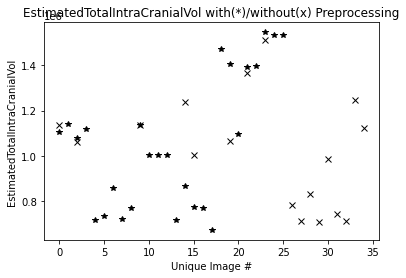

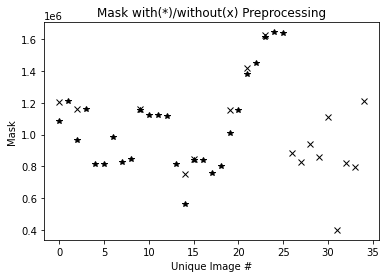

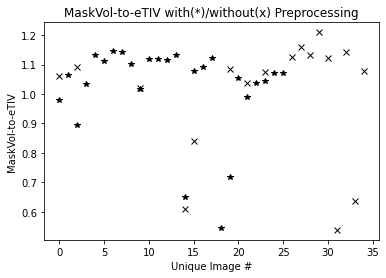

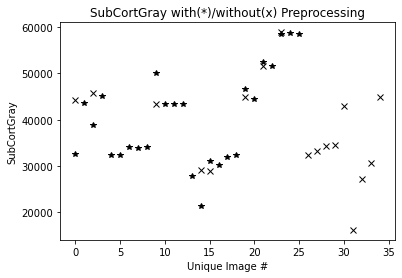

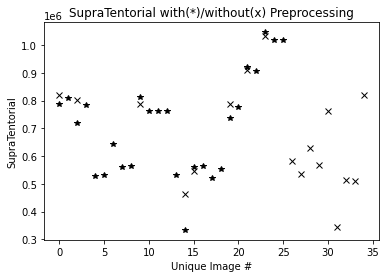

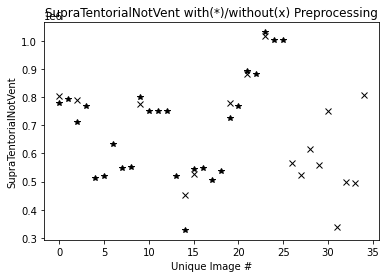

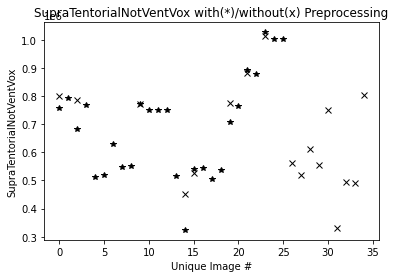

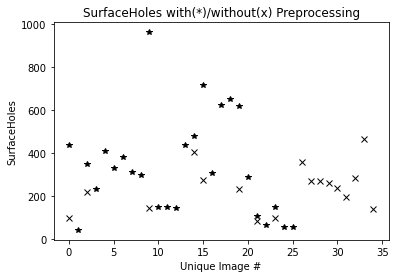

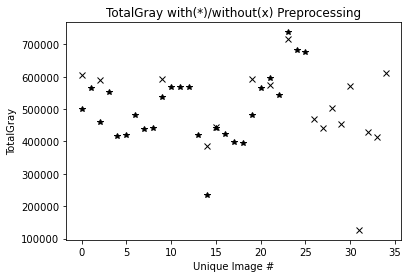

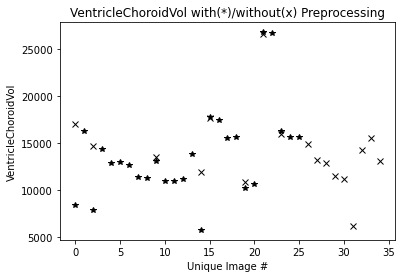

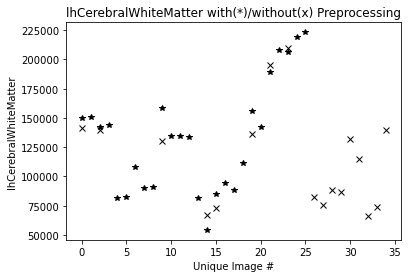

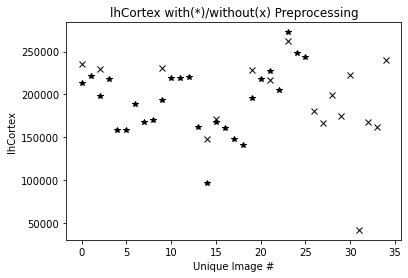

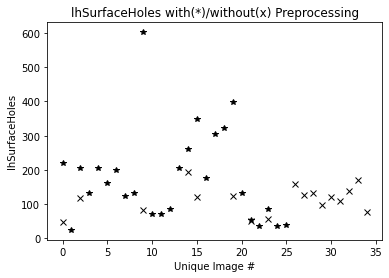

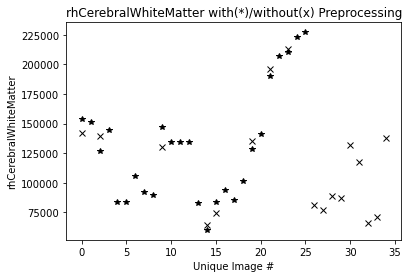

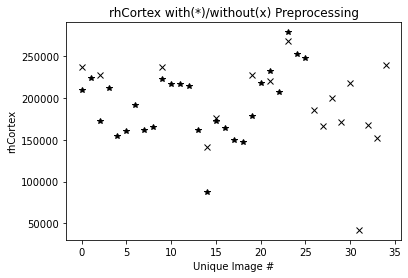

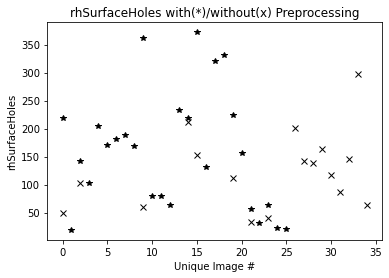

In [44]:
metricLabels = list(measDf)

for l in metricLabels:
    # Plot the difference
    fig = plt.figure()
    fig.patch.set_facecolor('w')
    y1 = list(df[l+"_preproc"].values)
    y2 = list(df[l+"_orig"].values)
    
    for x in range(df.shape[0]):
        if y1[x] is not np.nan: plt.plot(x, y1[x], 'k*')
        if y2[x] is not np.nan: plt.plot(x, y2[x], 'kx')
        
    plt.title(l+" with(*)/without(x) Preprocessing")
    plt.xlabel("Unique Image #")
    plt.ylabel(l)
    plt.show()

# Pulling in info from the session metadata

In [50]:
## Load the subject ages, sexes, year of scan, and scanner
fn = "/Users/schabdachj/Data/22q11/tables/session_metainfo_27Oct2020.csv"

df = pd.read_csv(fn, encoding='latin-1')
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(index=0)
df = df.infer_objects()
cols = ['SUBJECT_ID', 'DeID.GS.bucket.path', 'SEX', 'Year.of.Study', 'OBJECT_INFO...age_at_imaging_.days.', 'DeviceSerialNumber', 'StationName', 'ImageType']
sesMetaDf = df[cols].drop_duplicates()

In [52]:
## Get the folders containing each session in the main df

def getPathFromSession(session):
    
    # Get the session as a subdirectory
    sess = session.split('-')[1]
    
    # Use glob to find the possible subject/DeID paths
    searchStr = "/Users/schabdachj/Data/22q11/sourcedata/22q_*/**/GCPDicom*/"+sess
    paths = glob.glob(searchStr, recursive=True)
    
    # Remove bad paths:
    # - Anyting containing GCPDicom 2+ times
    path = [p for p in paths if p.count("GCPDicom") == 1][0]

    
    # Replace the first part of the path with the path that exists locally
    path = "/".join(path.split('/')[:-1])
    path = path.replace('Users/schabdachj/Data/22q11/sourcedata', '22q_dev2020July_DeID')
    
    return path

    
origDf['DeID.GS.bucket.path'] = [getPathFromSession(ses) for ses in origDf['session']]
preprocDf['DeID.GS.bucket.path'] = [getPathFromSession(ses) for ses in preprocDf['session']]

In [53]:
## Join mainDf and sesMetaDf

origDf = origDf.reset_index()
origDf = origDf.merge(sesMetaDf.reset_index(), on='DeID.GS.bucket.path').dropna()
print(origDf.shape)

preprocDf = preprocDf.reset_index()
preprocDf = preprocDf.merge(sesMetaDf.reset_index(), on='DeID.GS.bucket.path').dropna()
print(preprocDf.shape)

print(list(origDf))
print(list(preprocDf))

## Filter out derived images
origDf[origDf['ImageType']]

(162, 36)
(243, 35)
['index_x', 'session_id', 'subj', 'session', 'run', 'BrainSeg', 'BrainSegNotVent', 'BrainSegNotVentSurf', 'BrainSegVol-to-eTIV', 'CerebralWhiteMatter', 'Cortex', 'EstimatedTotalIntraCranialVol', 'Mask', 'MaskVol-to-eTIV', 'SubCortGray', 'SupraTentorial', 'SupraTentorialNotVent', 'SupraTentorialNotVentVox', 'SurfaceHoles', 'TotalGray', 'VentricleChoroidVol', 'lhCerebralWhiteMatter', 'lhCortex', 'lhSurfaceHoles', 'rhCerebralWhiteMatter', 'rhCortex', 'rhSurfaceHoles', 'DeID.GS.bucket.path', 'index_y', 'SUBJECT_ID', 'SEX', 'Year.of.Study', 'OBJECT_INFO...age_at_imaging_.days.', 'DeviceSerialNumber', 'StationName', 'ImageType']
['session_id', 'subj', 'session', 'run', 'BrainSeg', 'BrainSegNotVent', 'BrainSegNotVentSurf', 'BrainSegVol-to-eTIV', 'CerebralWhiteMatter', 'Cortex', 'EstimatedTotalIntraCranialVol', 'Mask', 'MaskVol-to-eTIV', 'SubCortGray', 'SupraTentorial', 'SupraTentorialNotVent', 'SupraTentorialNotVentVox', 'SurfaceHoles', 'TotalGray', 'VentricleChoroidVol', 

KeyError: "None of [Index(['ORIGINAL PRIMARY M ND NORM',\n       'DERIVED SECONDARY MPR CSA MPR THICK  M ND NORM',\n       'DERIVED PRIMARY DIFFUSION ADC ND NORM',\n       'DERIVED PRIMARY DIFFUSION EXP ND NORM',\n       'ORIGINAL PRIMARY DIFFUSION NONE ND NORM MOSAIC',\n       'DERIVED PRIMARY DIFFUSION FA ND NORM',\n       'DERIVED PRIMARY DIFFUSION TRACEW ND NORM',\n       'ORIGINAL PRIMARY M ND NORM',\n       'DERIVED SECONDARY MPR CSA MPR THICK  M ND NORM',\n       'DERIVED PRIMARY DIFFUSION ADC ND NORM',\n       ...\n       'ORIGINAL PRIMARY M SWI ND NORM',\n       'ORIGINAL PRIMARY DIFFUSION NONE ND NORM MOSAIC',\n       'DERIVED PRIMARY ASL ND NORM MOCO MOSAIC',\n       'DERIVED PRIMARY DIFFUSION TRACEW ND NORM',\n       'DERIVED PRIMARY DIFFUSION FA ND NORM',\n       'DERIVED PRIMARY DIFFUSION ADC ND NORM',\n       'DERIVED PRIMARY DIFFUSION EXP ND NORM',\n       'ORIGINAL PRIMARY ASL NONE ND NORM MOSAIC',\n       'ORIGINAL PRIMARY M ND NORM',\n       'DERIVED SECONDARY MPR CSA MPR THICK  M ND NORM'],\n      dtype='object', length=162)] are in the [columns]"

# Histograms of Metrics

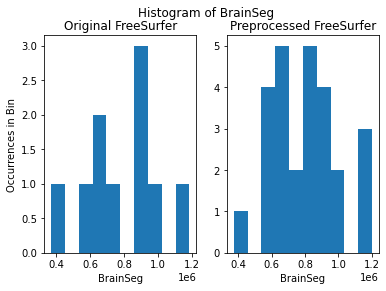

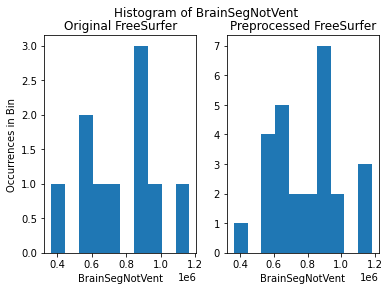

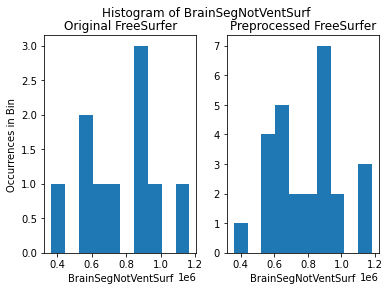

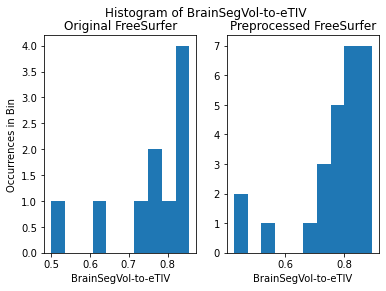

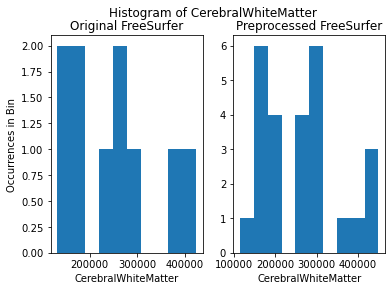

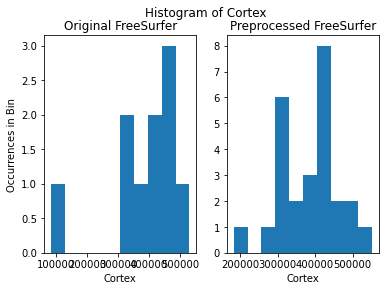

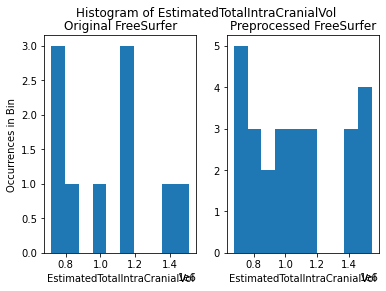

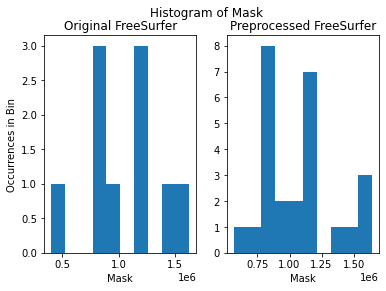

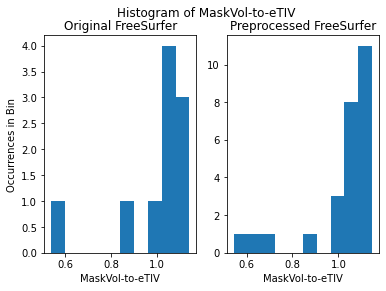

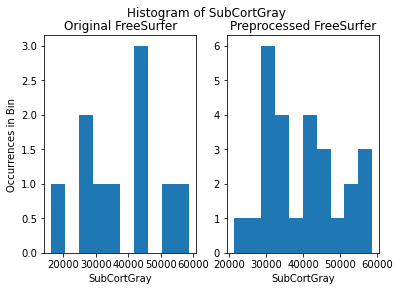

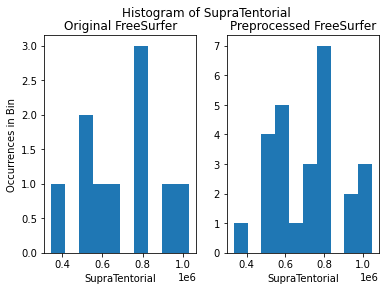

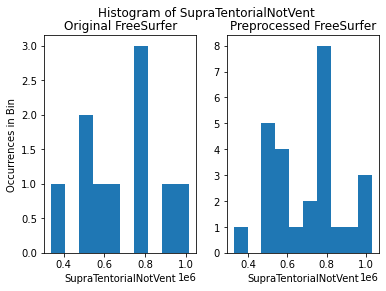

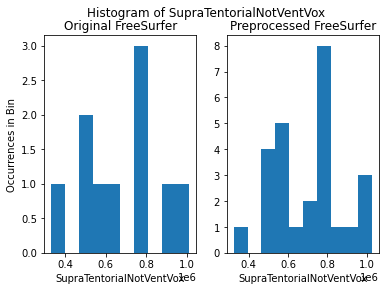

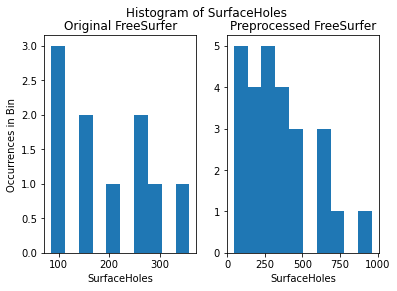

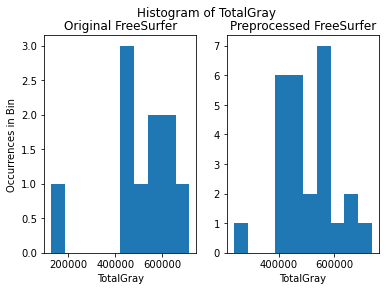

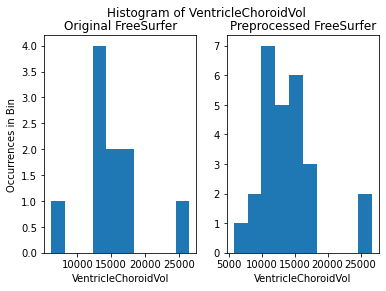

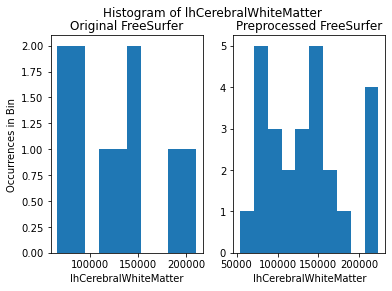

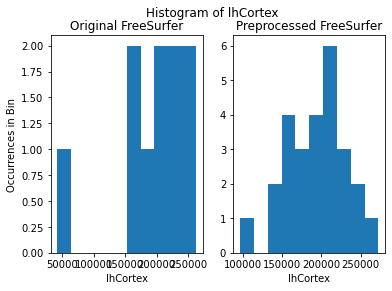

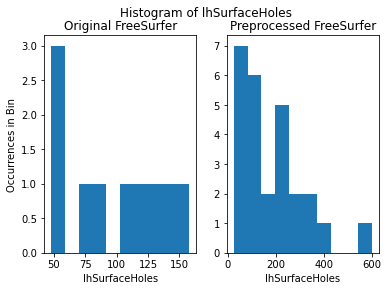

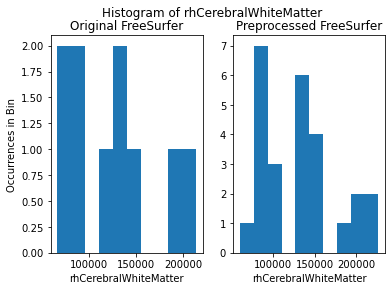

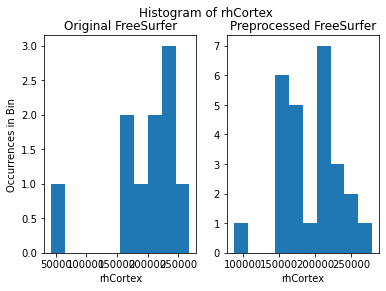

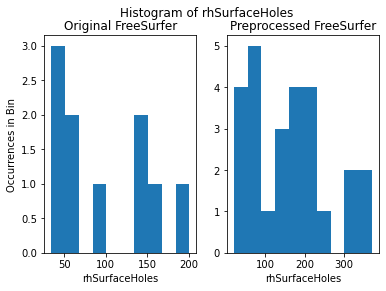

In [10]:
def plotMetricHist(metricList, label, subtitles=[]):

    if len(metricList) == 1:
        plt.figure()
        plt.hist(metricList[0])
        plt.xlabel(label)
        plt.ylabel('Occurrences in Bin')
        
    elif len(metricList) < 4:
        fig, axs = plt.subplots(1, len(metricList))
        for i in range(len(metricList)):
            axs[i].hist(metricList[i])
            axs[i].set_title(subtitles[i])
        
        plt.setp(axs, xlabel=label)
        plt.setp(axs[0], ylabel='Occurrences in Bin')
        
    plt.suptitle("Histogram of "+label)    
    plt.show()
        
for c in list(measPreDf):
    plotMetricHist([origDf[c].astype(float), preprocDf[c].astype(float)], c, 
                   ["Original FreeSurfer", "Preprocessed FreeSurfer"])

# Regression: Metric vs. Age at Scan

In [11]:
list(origDf)

['session_id',
 'subj',
 'session',
 'run',
 'BrainSeg',
 'BrainSegNotVent',
 'BrainSegNotVentSurf',
 'BrainSegVol-to-eTIV',
 'CerebralWhiteMatter',
 'Cortex',
 'EstimatedTotalIntraCranialVol',
 'Mask',
 'MaskVol-to-eTIV',
 'SubCortGray',
 'SupraTentorial',
 'SupraTentorialNotVent',
 'SupraTentorialNotVentVox',
 'SurfaceHoles',
 'TotalGray',
 'VentricleChoroidVol',
 'lhCerebralWhiteMatter',
 'lhCortex',
 'lhSurfaceHoles',
 'rhCerebralWhiteMatter',
 'rhCortex',
 'rhSurfaceHoles',
 'DeID.GS.bucket.path',
 'index',
 'SUBJECT_ID',
 'SEX',
 'Year.of.Study',
 'OBJECT_INFO...age_at_imaging_.days.',
 'DeviceSerialNumber',
 'StationName']

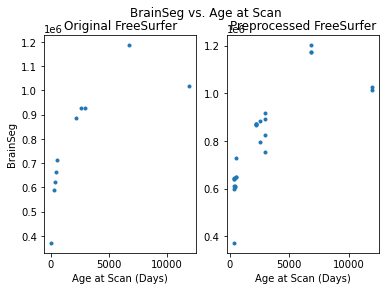

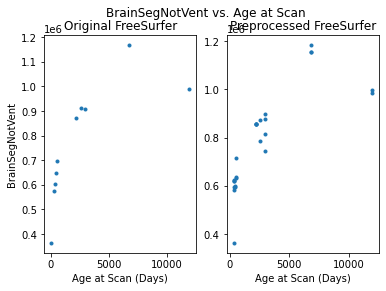

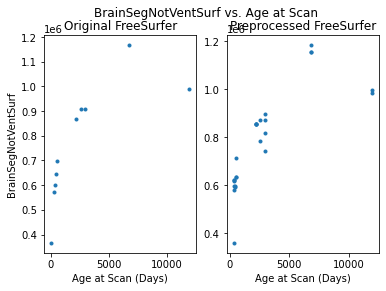

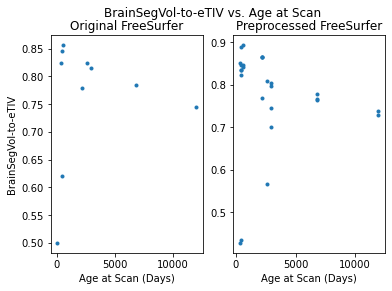

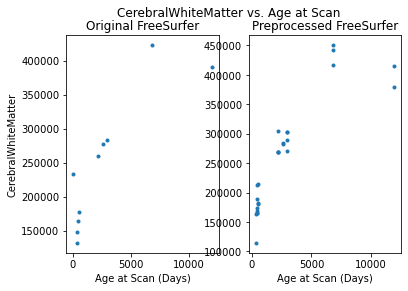

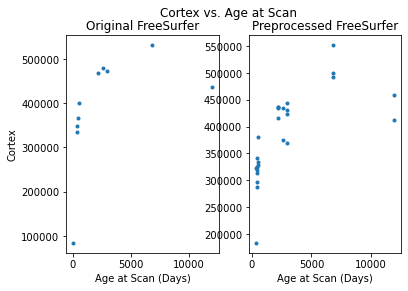

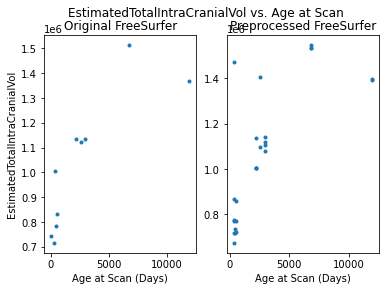

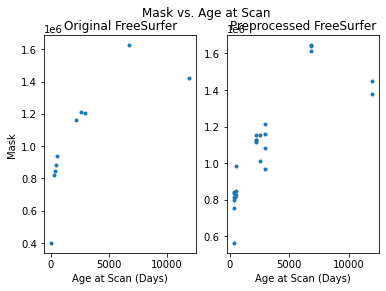

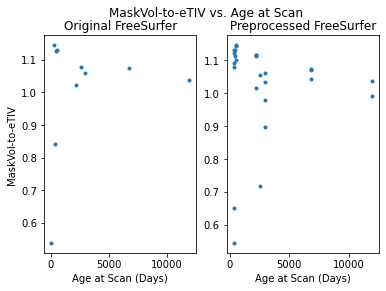

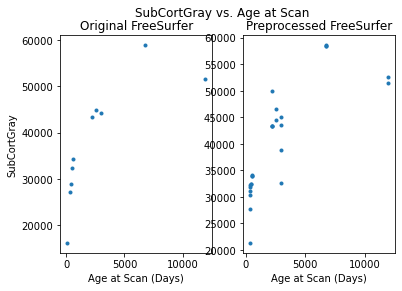

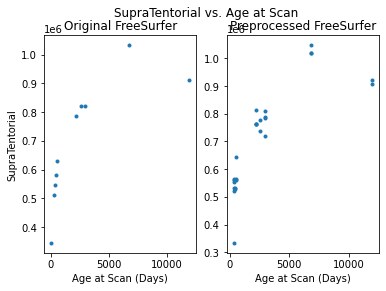

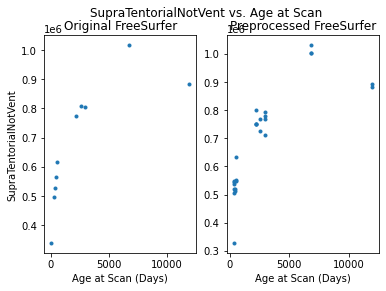

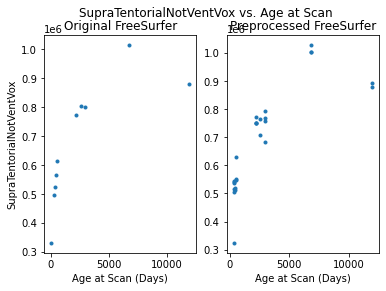

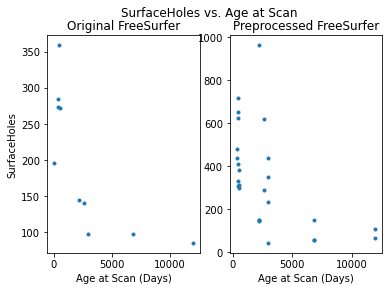

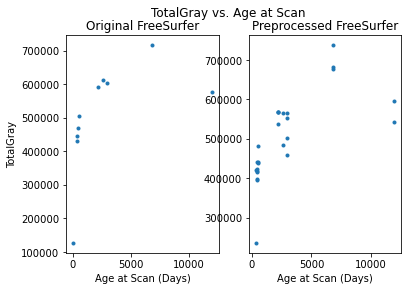

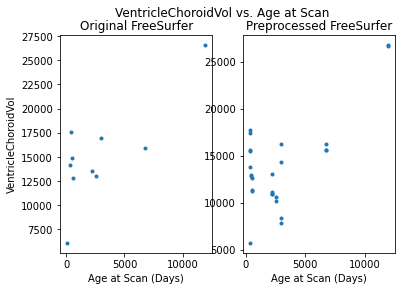

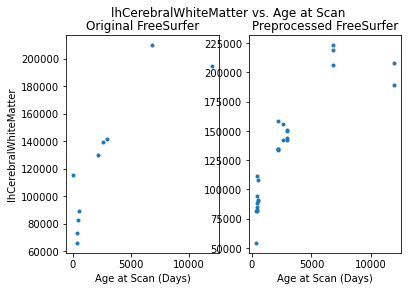

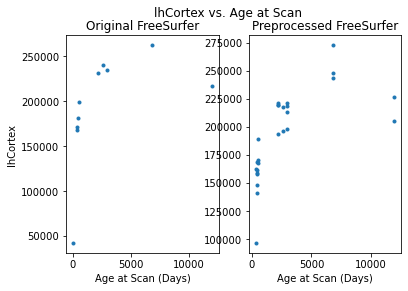

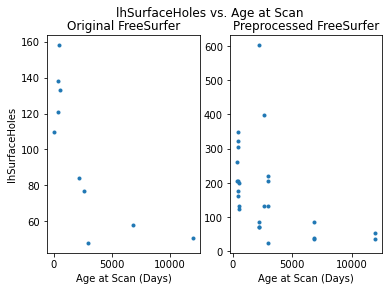

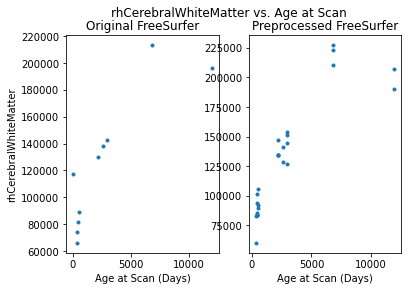

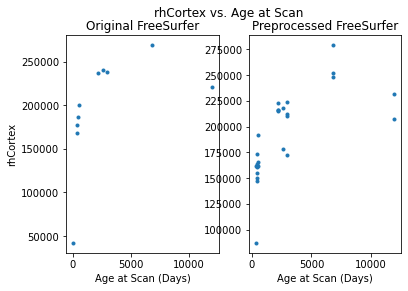

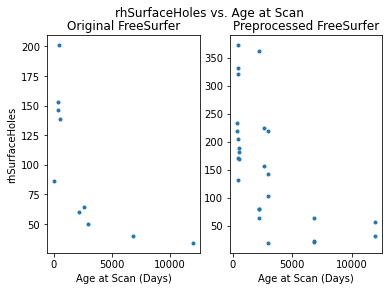

In [12]:
def plotMetricVsAge(metricList, ageList, label, subtitles):
    
    if len(metricList) == 1:
        plt.figure()
        plt.plot(age, metric, '.')
        plt.xlabel("Age at Scan (Days)")
        plt.ylabel(label)
        
    elif len(metricList) < 4:
        fig, axs = plt.subplots(1, len(metricList))
        for i in range(len(metricList)):
            axs[i].plot(ageList[i], metricList[i], '.')
            axs[i].set_title(subtitles[i])
        
        plt.setp(axs, xlabel="Age at Scan (Days)")
        plt.setp(axs[0], ylabel=label)
        
    plt.suptitle(label+" vs. Age at Scan")
    plt.show()
        
for c in list(measPreDf):
    plotMetricVsAge([origDf[c].astype(float), preprocDf[c].astype(float)],
                    [origDf['OBJECT_INFO...age_at_imaging_.days.'], preprocDf['OBJECT_INFO...age_at_imaging_.days.']], 
                    c,
                    ["Original FreeSurfer", "Preprocessed FreeSurfer"])

# Before and after preprocessing

# Example Regression: Brain Volume vs. Age

In [13]:
list(mainDf)

NameError: name 'mainDf' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.metrics import mean_squared_error, r2_score

# Convert SEX column into a dichotomous variable
mainDf['isMale'] = np.where(mainDf['SEX']!= 'M', 1, 0)
mainDf['age2'] = mainDf['OBJECT_INFO...age_at_imaging_.days.']**2

X = mainDf[['OBJECT_INFO...age_at_imaging_.days.', 'age2', 'isMale', 'SurfaceHoles']]
y = mainDf['TotalGray']

X = mainDf[mainDf['OBJECT_INFO...age_at_imaging_.days.'] > 1095][['OBJECT_INFO...age_at_imaging_.days.', 'age2', 'isMale']] #'SurfaceHoles']]
y = mainDf[mainDf['OBJECT_INFO...age_at_imaging_.days.'] > 1095]['TotalGray']

# Create an instance of the linear regression model
model = LinearRegression()

# # N-fold cross validation
# cv_results = cross_validate(model, X, y,
#                             scoring=('r2', 'neg_mean_squared_error', 'explained_variance'))

# Split the feature and class pairs intotraining and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model.fit(X, y)

# Test the model
predictions = model.predict(X)

# Compare the predictions to the actual values
# Root mean squared error - lower is better
rmse = (np.sqrt(mean_squared_error(y, predictions)))
# r squared - closer to 1 is better
r2 = r2_score(y, predictions)

print(rmse)
print(r2)

def plotRegressionPredictions(x, y, pred):
    # Plot a figure 
    plt.figure()
    plt.scatter(x, y, c='b')
    plt.scatter(x, predictions, c='r', marker='+')

    # add the regression line
    reg_x = np.linspace(min(x),
                        max(x),
                        x.shape[0]-1)
    # plt.plot(reg_x, reg_x*model.coef_[)

    plt.xlabel('Age at Scan (Days)')
    plt.ylabel('Total Gray Volume')
    plt.title('Predicted Gray Matter Volume')
    plt.show()

    
plotRegressionPredictions(X['OBJECT_INFO...age_at_imaging_.days.'], y, predictions)

print(min(X['OBJECT_INFO...age_at_imaging_.days.']))
print(max(X['OBJECT_INFO...age_at_imaging_.days.']))

print(model.coef_)

In [ ]:
peds = mainDf[mainDf['OBJECT_INFO...age_at_imaging_.days.'] > 1095]
peds[(peds['OBJECT_INFO...age_at_imaging_.days.'] < 4000) & (peds['TotalGray'] < 500000)][['subj', 'SurfaceHoles', 'OBJECT_INFO...age_at_imaging_.days.', 'SEX' ]]

In [ ]:
residuals = np.abs(y - predictions)
plt.figure()
plt.hist(residuals)

yq = peds[peds['subj'] == 'sub-22q0172']['TotalGray'].values[0]
print(yq)
idx = list(y.values).index(yq)
resid = (abs(yq-predictions[idx]))
print(predictions[idx])

print(resid/yq)
print(resid/predictions[idx])

In [ ]:
np.multiply